<a href="https://colab.research.google.com/github/MaTheusSlv/PosGraduacaoMackenzie_CienciaDeDados/blob/main/BIG_DATA_ANALYTICS_MINERACAO_E_ANALISES_DE_DADOS_T6_A_Atividade_de_Aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 5**
## CASO: Clustering, Segmentando Países pela Força de Trabalho
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho.

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**.

# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Suprimir todos os FutureWarnings(Por algum motivo teve bastante)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979.

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [ ]:
#averiguando o dataset
print(df.dtypes)
print(df.columns)
print(df.describe)
print()
print(f'Quantidade de NaNs:')
print(df.isna().sum())
print()
df[df.isna().any(axis=1)]

Country     object
Agr        float64
Min        float64
Man        float64
PS         float64
Con        float64
SI         float64
Fin        float64
SPS        float64
TC         float64
dtype: object
Index(['Country', 'Agr', 'Min', 'Man', 'PS', 'Con', 'SI', 'Fin', 'SPS', 'TC'], dtype='object')
<bound method NDFrame.describe of            Country   Agr  Min   Man   PS   Con    SI   Fin   SPS   TC
0          Belgium   3.3  0.9  27.6  0.9   8.2  19.1   6.2  26.6  7.2
1          Denmark   9.2  0.1  21.8  0.6   8.3  14.6   6.5  32.2  7.1
2           France  10.8  0.8  27.5  0.9   8.9  16.8   6.0  22.6  5.7
3       W. Germany   6.7  1.3  35.8  0.9   7.3  14.4   5.0  22.3  6.1
4          Ireland  23.2  1.0  20.7  1.3   7.5  16.8   2.8  20.8  6.1
5            Italy  15.9  0.6  27.6  0.5  10.0  18.1   1.6  20.1  5.7
6       Luxembourg   7.7  3.1  30.8  0.8   9.2  18.5   4.6  19.2  6.2
7      Netherlands   6.3  0.1  22.5  1.0   9.9  18.0   6.8  28.5  6.8
8   United Kingdom   2.7  1.4  30.2  

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC


## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

#normalizador
scaler = StandardScaler()

#fazendo a normalização
scaler.fit(df.drop(columns='Country'))
X = scaler.transform(df.drop(columns='Country'))

#resultado
X[0:10]

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507],
       [-0.21192785, -0.68738647,  0.08619551, -1.10512639,  1.13694923,
         1.14619796, -0.87207332,  0.01148634, -0.62014411],
       [-0.74982093,  1.94085592,  0.55187516, -0.29192018,  0.64117263,
         1.23535621,  0.21801833, -0.12290385, -0.25369532],
       [-0.84165634, -1.21303495, -0.65598143,  0.2502173 ,  1

## Número de Clusters

(Moodle) **Q1**. Qual o melhor número de clusters pela *regra do cotovelo* e pelo valor médio de silhueta aplicanaod o `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



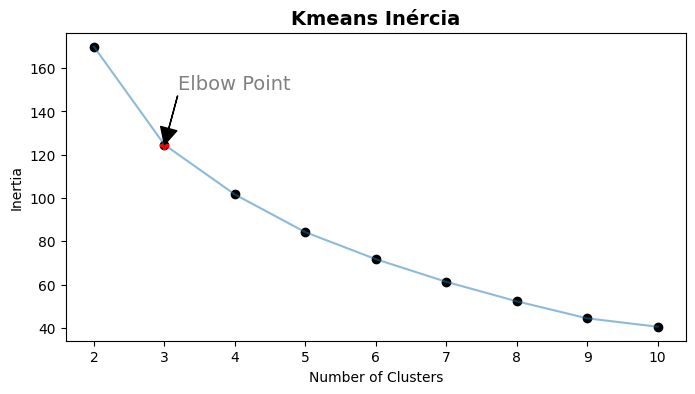

O melhor número de clusters pela regra do cotovelo é 3


In [ ]:
#elbow method
from sklearn.cluster import KMeans

def inercia(X=X, kmin=1, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1234)
      clf.fit(X)
      inertia.append(clf.inertia_)

  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(kmin , kmax+1) , inertia , 'ko')
  plt.plot(np.arange(kmin , kmax+1) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,2,10)
# adicionado depois... ;-)
plt.plot(3 , inertia[1] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[1]),
            xytext=(10, 40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()
print('O melhor número de clusters pela regra do cotovelo é 3')

In [ ]:
#silhouette
from sklearn import metrics

#iterando as silhuetas
for n_clusters in range(2, 11):
  clf = KMeans(n_clusters = n_clusters, random_state = 1234)
  clf.fit(X)
  labels = clf.labels_
  print(f'A silhueta média para {n_clusters} clusters é: ', np.round(metrics.silhouette_score(X, labels, metric='euclidean'),3))

print()
print('O melhor número de clusters pela silhueta é 2')
print()

A silhueta média para 2 clusters é:  0.456
A silhueta média para 3 clusters é:  0.263
A silhueta média para 4 clusters é:  0.197
A silhueta média para 5 clusters é:  0.201
A silhueta média para 6 clusters é:  0.192
A silhueta média para 7 clusters é:  0.177
A silhueta média para 8 clusters é:  0.182
A silhueta média para 9 clusters é:  0.189
A silhueta média para 10 clusters é:  0.168

O melhor número de clusters pela silhueta é 2



(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`),`complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue outros parâmetros não solicitados.

In [ ]:
#descobrindo o N° de clusters
for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
print()
print('O melhor número de clusters pela silhueta é 2')
print()

#comparando os scores de média de silhueta pra cada ligação
from sklearn.cluster import AgglomerativeClustering

clfward = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clfcomp = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clfsingle = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')

#fazendo fit
clfward.fit(X)
clfcomp.fit(X)
clfsingle.fit(X)

# Resultados
labelsward = clfward.labels_
print('Silhueta média para ward é ', np.round( metrics.silhouette_score(X, labelsward, metric='euclidean'),3))
labelscomp = clfcomp.labels_
print('Silhueta média para complete é ', np.round( metrics.silhouette_score(X, labelscomp, metric='euclidean'),3))
labelssingle = clfsingle.labels_
print('Silhueta média para single é ', np.round( metrics.silhouette_score(X, labelssingle, metric='euclidean'),3))
print()


Silhueta média para 2 clusters:  0.456
Silhueta média para 3 clusters:  0.27
Silhueta média para 4 clusters:  0.251
Silhueta média para 5 clusters:  0.225
Silhueta média para 6 clusters:  0.192
Silhueta média para 7 clusters:  0.18
Silhueta média para 8 clusters:  0.165
Silhueta média para 9 clusters:  0.19
Silhueta média para 10 clusters:  0.137

O melhor número de clusters pela silhueta é 2

Silhueta média para ward é  0.456
Silhueta média para complete é  0.456
Silhueta média para single é  0.461



## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as mátricas e resultados para uma *solução*.

(Moodle) **Q3**. Verifique a *distribuição* da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

> Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um *outlier*.



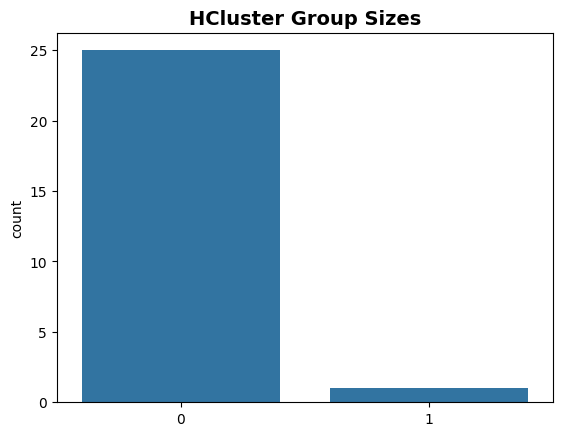

Valores do gráfico
0    25
1     1
Name: count, dtype: int64


In [ ]:
clf3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
clf3.fit(X)
label3 = clf3.labels_

#plot do gráfico
sns.countplot(x=label3)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

#verificando mais a fundo as quantidades
print('Valores do gráfico')
qtd = pd.DataFrame(label3)
freq = qtd.value_counts()
print(freq)

In [ ]:
print('Esta não é uma clusterização adequada, pois é demasiadamente desbalanciada, por ter apenas 1\nregistro com valor para um grupo e não pode-se assim distinguir o mesmo de um outlier')

Esta não é uma clusterização adequada, pois é demasiadamente desbalanciada, por ter apenas 1
registro com valor para um grupo e não pode-se assim distinguir o mesmo de um outlier


## Clusterização `Kmeans`,  $K=3$.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele?

(Moodle) **Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.



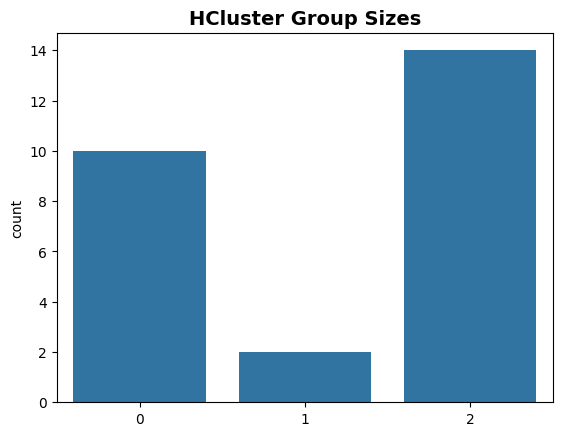

In [ ]:
#agora com 3 clusters
clf = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clf.fit(X)

#labels com 3 clusters
labels = clf.labels_

#plot do gráfico distribuição com 3
sns.countplot(x=labels)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

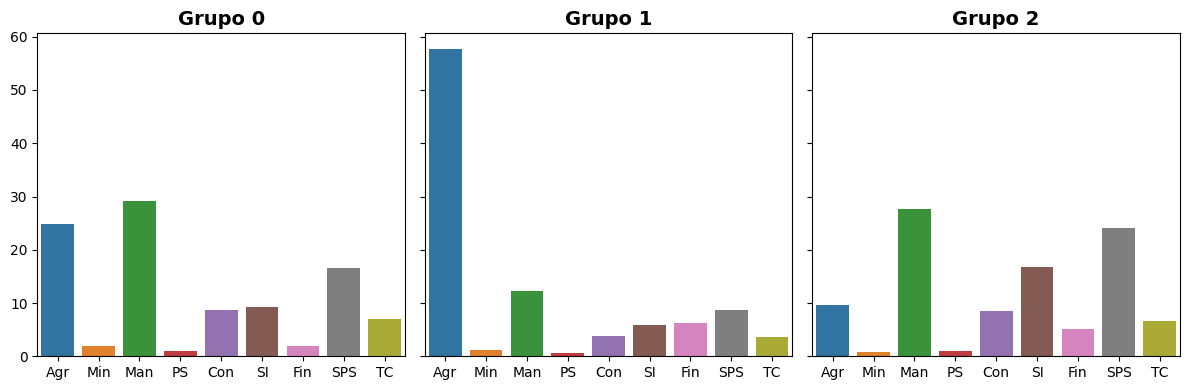

O grupo que se destaca com média maior para AGR é o Grupo 1 com 57.75 %
Paises do Grupo 1:
17        Turkey
25    Yugoslavia
Name: Country, dtype: object


Sem o AGR e sem o Grupo 1


,Cluster,Min,Man,PS,Con,SI,Fin,SPS,TC
0,0,1.85,29.080000,0.900000,8.670000,9.180000,2.000000,16.630000,6.92
2,2,0.85,27.621429,0.957143,8.421429,16.678571,5.114286,24.078571,6.70


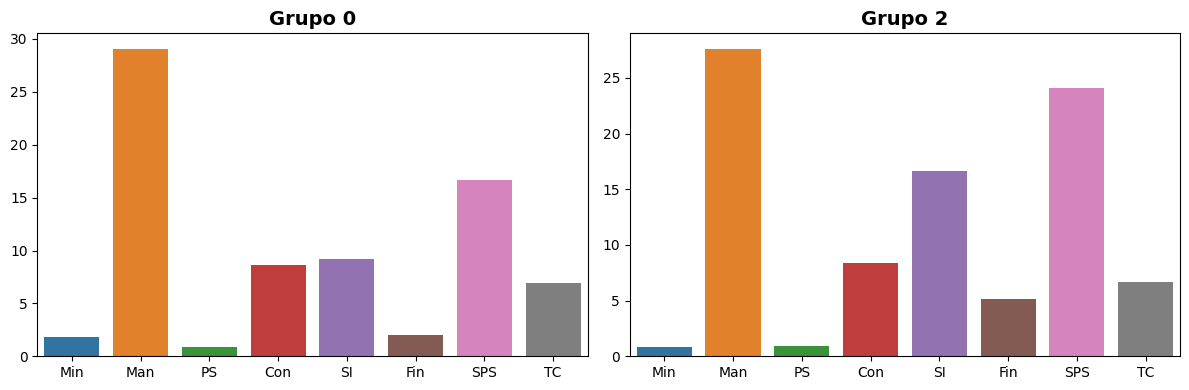


Pode-se destacar que em ambos os grupos se destaca a porcentagem de MAN


In [ ]:
#usando os labels de 3 clusters
df['Cluster'] = labels

#% média dos atributos dos grupos
g = pd.DataFrame( df.drop(columns='Country').groupby('Cluster').mean() ).reset_index()

#plot
fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['0','1','2']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i), fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

#resultado
print('O grupo que se destaca com média maior para AGR é o Grupo 1 com', g[g.Cluster == 1]['Agr'][1], '%')

print('Paises do Grupo 1:')
print(df['Country'].loc[df['Cluster'] == 1])

#sem o AGR e sem o grupo 1
print()
print()
print('Sem o AGR e sem o Grupo 1')
g = g.drop(columns='Agr')
g = g.loc[g['Cluster'] != 1]
display(g)

#novo plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(data=g[g.Cluster==0].drop(columns='Cluster'), ax=ax1)
ax1.set_title('Grupo 0', fontsize=14, weight='bold')
sns.barplot(data=g[g.Cluster==2].drop(columns='Cluster'), ax=ax2)
ax2.set_title('Grupo 2', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

print()
print('Pode-se destacar que em ambos os grupos se destaca a porcentagem de MAN')